## Lab 5 - Convolutional Neural Network "from scratch"



In Lab 5 and Lab 6 you will learn to distinguish dogs from cats!

Data:
https://drive.google.com/drive/folders/1nzVk4GOvKR6P87uPszUkKMPtaXV_wrZf?usp=sharing

Fill all the necessary gaps and fit neural networks for solving the binary classification task.

Task for Lab 5:

1. Build and fit CNN with 3 convolutional layers for binary classification
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

First, let's load all the necessary functions:


In [65]:
import matplotlib.pyplot as plt

In [1]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.applications import VGG16
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


The images collected for training and testing the deep learning model must be prepared: split the entire set into a training, validation and test sample, observing the balancing of classes (with binary classification they should be approximately equal in all three samples).

This has _already_ been done: in the Cats_and_Dogs directory there are three subdirectories: train, test and val - training, test and validation samples, respectively.

In [3]:
# Initialize the folders with train, test and validation datasets (in "/My Drive/..." or from your local repository where you have downloaded data):

train = 'Cats_and_Dogs/Cats_and_Dogs/train'
val =   'Cats_and_Dogs/Cats_and_Dogs/val'
test =  'Cats_and_Dogs/Cats_and_Dogs/test'

# The shape of the RGB image
img_width, img_height, channels = 150, 150, 3 # you can try different sizes

# input shape
input_shape = (img_width, img_height, 3)
# position matters!
# Number_of_channels can be at the first or the last position
# in our case - "channels last"

# batch size
batch_size = 64
# train set size
nb_train_samples = 20000
# validation set size 
nb_validation_samples = 2490
# test set size
nb_test_samples = 2500

## Prepare the data.

You don’t have to manually change the shapes of 25000 images and convert them into the necessary format for keras (img_width, img_height, 3).

We will use the built-in image preprocessing function for training deep neural networks _ImageGenerator_.

It performs scaling, resizes selected images and prepares batches (mini-samples) to train the model.

In [4]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

val_generator = datagen.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


Set the network architecture by sequentially adding layers to it:
1. A convolutional layer with 16 neurons, filter size 3x3. Activation function - 'relu'
2. MaxPooling layer with filter size 2x2.
3. A convolutional layer with 32 neurons, filter size 3x3. Activation function - 'relu'
4. MaxPooling layer with filter size 2x2.
5. A convolutional layer with 64 neurons, filter size 3x3. Activation function - 'relu'
6. MaxPooling layer with filter size 2x2.
7. Operation model.add (Flatten ()), which makes a one-dimensional vector of the resulting feature maps.
8. A fully connected layer with 64 neurons. Activation function - 'relu'
9. Operation model.add (Dropout (0.5)) - excludes a neuron from the current layer with a 50% probability to avoid overfitting. retraining.
10. A fully connected layer with 1 neuron. Activation function - 'sigmoid', because binary classification model.

Add to the model all the missing layers, by analogy with the already specified.
Keras documentation: https://keras.io/layers/about-keras-layers/

In [52]:
model = Sequential()

# 1: +Convolutional
# For example:
model.add(Conv2D(16, (3, 3), input_shape=(150, 150, 3)))
#model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))

# 2: +Pooling
model.add(MaxPooling2D(pool_size=(2, 2), input_shape=(150, 150, 3)))
# 3:
model.add(Conv2D(32, (3, 3),input_shape=(150, 150, 3)))
#     +Relu
model.add(Activation('relu'))

# 4:  +Pooling 
model.add(MaxPooling2D(pool_size=(2, 2), input_shape=(150, 150, 3)))
# 5:  +Convolutional
model.add(Conv2D(64, (3, 3),input_shape=(150, 150, 3)))
#     +Relu
model.add(Activation('relu'))
# 6:  +Pooling
model.add(MaxPooling2D(pool_size=(2, 2), input_shape=(150, 150, 3)))
# 7:  +Flattening
model.add(Flatten())
# 8:  +Convolutional
model.add(Dense(64, activation='relu', input_shape=(150, 150, 3)))
#     +ReLu
 #9:  +Dropout
model.add (Dropout (0.5))
# 10: +Dense
model.add(Dense(1,activation='sigmoid', input_shape=(150, 150, 3)))
#     +Sigmoid


In [59]:
model = Sequential()

# 1: +Convolutional
# For example:
model.add(Conv2D(16, (3, 3), input_shape=(150, 150, 3)))
#model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))

# 2: +Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# 3:
model.add(Conv2D(32, (3, 3)))
#     +Relu
model.add(Activation('relu'))

# 4:  +Pooling 
model.add(MaxPooling2D(pool_size=(2, 2)))
# 5:  +Convolutional
model.add(Conv2D(64, (3, 3),))
#     +Relu
model.add(Activation('relu'))
# 6:  +Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# 7:  +Flattening
model.add(Flatten())
# 8:  +Convolutional
model.add(Dense(64, activation='relu'))
#     +ReLu
 #9:  +Dropout
model.add (Dropout (0.5))
# 10: +Dense
model.add(Dense(1,activation='sigmoid'))
#     +Sigmoid


In [60]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [61]:
# use the generator to train the model (analogue of the fit method)
# 1 epoch of training on a CPU will take 4-6 minutes. The GPU is an ~order of magnitude faster.
#epochs=, #try different number of epochs: 10, 15, 20; check the loss and accuracy;
hystory=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/10
312/312 [==============================] - 386s 1s/step - loss: 0.6537 - accuracy: 0.6132 - val_loss: 0.6011 - val_accuracy: 0.7060
Epoch 2/10
312/312 [==============================] - 447s 1s/step - loss: 0.5501 - accuracy: 0.7185 - val_loss: 0.5672 - val_accuracy: 0.7374
Epoch 3/10
312/312 [==============================] - 429s 1s/step - loss: 0.4924 - accuracy: 0.7622 - val_loss: 0.3871 - val_accuracy: 0.7671
Epoch 4/10
312/312 [==============================] - 413s 1s/step - loss: 0.4485 - accuracy: 0.7957 - val_loss: 0.4252 - val_accuracy: 0.7993
Epoch 5/10
312/312 [==============================] - 401s 1s/step - loss: 0.4081 - accuracy: 0.8146 - val_loss: 0.3447 - val_accuracy: 0.7861
Epoch 6/10
312/312 [==============================] - 404s 1s/step - loss: 0.3725 - accuracy: 0.8325 - val_loss: 0.4405 - val_accuracy: 0.8054
Epoch 7/10
312/312 [==============================] - 409s 1s/step - loss: 0.3381 - accuracy: 0.8507 - val_loss: 0.4986 - val_accuracy: 0.8067

In [62]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

Accuracy on test data: 81.85%


Plot the graphs: 

Loss(Number of epochs)

Accuracy(Number of epochs)

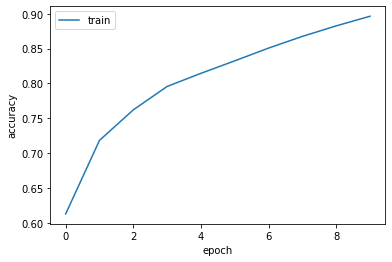

In [69]:
plt.plot(hystory.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

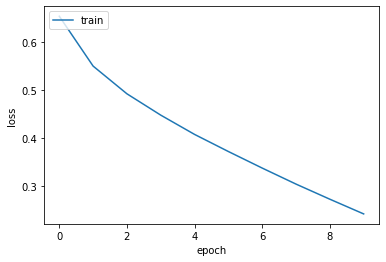

In [70]:
plt.plot(hystory.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

![alt text](Deeper.jpeg )

##  Lab 6 - Transfer Learning 

##### Let's try to improve the quality of recognition, using the method of transfer lerning - "transfer training." 

We will use weights of deep neural networks already trained on large dataset such as  ImageNet, and provide fine tuning of several additional dense layers on new data relevant to the current classification task. The more new images will differ from those on which the network has been trained, the more layers will need to be “retrained” in order to get good classification accuracy. The intuition here is that the model has already learned how to highlight the necessary features on the images in the large dataset, it only needs to be “tweaked” for a specific task.

Task for Lab 6:

1. Build and fit Transfer Learning model using pre-trained VGG16-model weights from keras application.
2. Do the same with another avaliable pre-trained deep learning model from keras application.
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)
4. Check the performance of your model with the custom image of cat or dog (so the model will tell which class this image belongs to)

In [71]:
# First, download the weights of the VGG16 network trained on the ImageNet dataset:

vgg16_net = VGG16(weights='imagenet', 
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(150, 150, 3))
vgg16_net.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights VGG16 in the process of learning will remain unchanged!

vgg16_net.summary()                       # pay attention to the number of trained and untrained parameters

58892288/58889256 [==============================] - 95s 2us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_____________________________________________________________

We construct our model of "transfer learning" by adding two fully connected layers to VGG16

In [72]:
# add layers to VGG16:

model = Sequential()
model.add(vgg16_net)

# + flattening
model.add(Flatten())
# + dense connected layer with 256 neurons
# + ReLu
model.add(Dense(256, activation='relu'))
# + Dropout
model.add (Dropout (0.5))
# + full layer with 1 neuron
# + sigmoid
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_15 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [73]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5), 
              metrics=['accuracy'])

E.g., it was like:


![alt text](VGG16.png )

and it becomes:

![alt text](VGG162.png )

In [74]:
# We also use the generator to train the model (similar to the fit method)
# Without using a GPU, learning 1 epoch of such a network will take about an hour. Plan your time =)
# If you have access to a GPU, you can try 10-12 epochs - the quality should increase even more.

model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=5,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/5
312/312 [==============================] - 4231s 14s/step - loss: 0.5274 - accuracy: 0.7261 - val_loss: 0.3534 - val_accuracy: 0.8557
Epoch 2/5
312/312 [==============================] - 4213s 14s/step - loss: 0.3471 - accuracy: 0.8475 - val_loss: 0.2851 - val_accuracy: 0.8800
Epoch 3/5
312/312 [==============================] - 4219s 14s/step - loss: 0.3010 - accuracy: 0.8713 - val_loss: 0.2320 - val_accuracy: 0.8891
Epoch 4/5
312/312 [==============================] - 4232s 14s/step - loss: 0.2772 - accuracy: 0.8826 - val_loss: 0.2634 - val_accuracy: 0.8998
Epoch 5/5
312/312 [==============================] - 4212s 14s/step - loss: 0.2613 - accuracy: 0.8920 - val_loss: 0.1831 - val_accuracy: 0.8982


In [80]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

Accuracy on test data: 88.46%


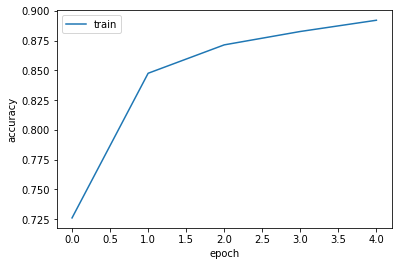

In [78]:
plt.plot(model.history.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

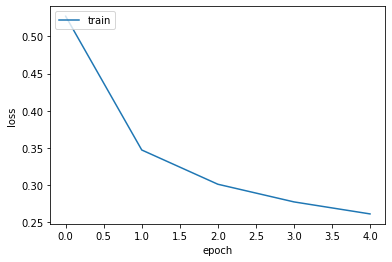

In [79]:
plt.plot(model.history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [87]:
check='check'
check_generator = datagen.flow_from_directory(
    check,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 2 images belonging to 2 classes.


файлы из папки

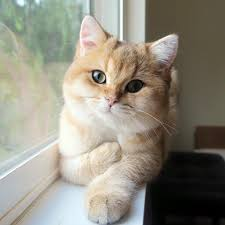

In [91]:
from IPython.display import Image
Image(filename='check/cats/Без названия.jpg')

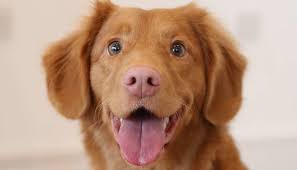

In [92]:
Image(filename='check/dogs/dog.jpg')

In [98]:
model.predict(check_generator)

array([[0.9295253 ],
       [0.00402888]], dtype=float32)